<a href="https://colab.research.google.com/github/Leorizky19/AI/blob/main/Tugas_Uas(mencari%20nilai%20lulus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=640e4736537432e3db104e5b11cd5e5489daf7bb82ab988e5d1e7d272d325597
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
#Read data
data = pd.read_excel("https://github.com/Leo-Rizky-Krisandi/Tugas-AI/blob/main/Data_mahasiswa.xlsx?raw=true")
data

,Id,Name,Ipk,Toefl,Tpa
0,1,Ahmad,3.40,320,350
1,2,Yusuf,3.25,350,400
2,3,Dani,2.70,450,450
3,4,Maya,2.60,355,460
4,5,Lani,3.80,400,470
5,6,Miya,2.90,410,250
6,7,Bane,3.55,470,500
7,8,Lalyla,3.33,420,455
8,9,Faramis,3.12,410,460
9,10,Zilong,3.85,365,400


In [ ]:
#Generate universe variable
# *Quality and service on subjective range [0,1]
# *Tip has range of [o,25] in units of pertage points

x_ipk= np.arange(0,5,1)
x_toefl= np.arange(300,600,1)
x_tpa= np.arange(0,750,1)

In [ ]:
#Generate fuzzy Membership functions
ipk_rendah = fuzz.trapmf(x_ipk,[0,0,1,2])
ipk_sedang = fuzz.trapmf(x_ipk,[1,2,3,4])
ipk_tinggi = fuzz.trapmf(x_ipk,[3,4,4,4])


In [ ]:
toefl_rendah = fuzz.trapmf(x_toefl,[0,300,310,320])
toefl_sedang = fuzz.trapmf(x_toefl,[350,380,420,460])
toefl_tinggi = fuzz.trapmf(x_toefl,[480,520,560,600])


In [ ]:
tpa_rendah = fuzz.trapmf(x_tpa,[0,0,300,400])
tpa_sedang = fuzz.trapmf(x_tpa,[400,450,550,600])
tpa_tinggi = fuzz.trapmf(x_tpa,[600,750,750,750])

In [ ]:
R=0.2
S=0.6
T=1

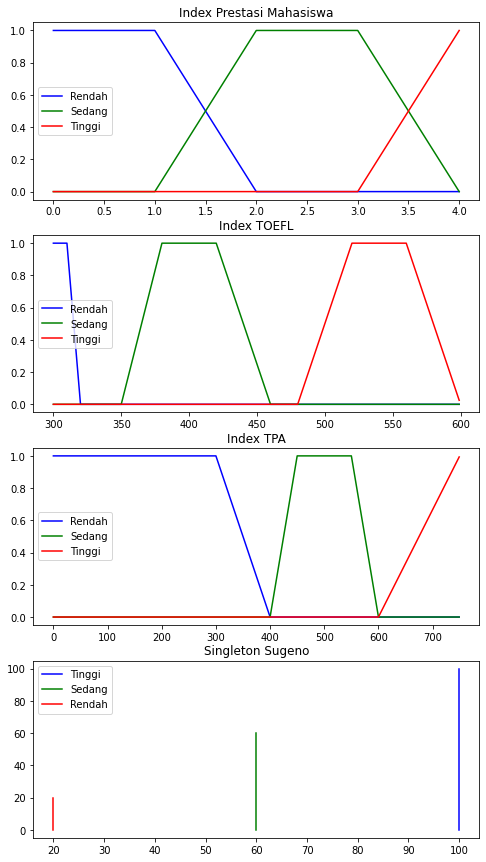

In [ ]:
#Visualize these universes and membership functions
fig,(ax0,ax1,ax2,ax3)=plt.subplots(nrows=4,figsize=(8,15))
ax0.plot(x_ipk, ipk_rendah, 'b', linewidth=1.5, label='Rendah')  
ax0.plot(x_ipk, ipk_sedang, 'g', linewidth=1.5, label='Sedang')  
ax0.plot(x_ipk, ipk_tinggi, 'r', linewidth=1.5, label='Tinggi')  
ax0.set_title('Index Prestasi Mahasiswa')  
ax0.legend()  

ax1.plot(x_toefl, toefl_rendah, 'b', linewidth=1.5, label='Rendah')  
ax1.plot(x_toefl, toefl_sedang, 'g', linewidth=1.5, label='Sedang')  
ax1.plot(x_toefl, toefl_tinggi, 'r', linewidth=1.5, label='Tinggi')  
ax1.set_title('Index TOEFL')  
ax1.legend()  

ax2.plot(x_tpa, tpa_rendah, 'b', linewidth=1.5, label='Rendah')  
ax2.plot(x_tpa, tpa_sedang, 'g', linewidth=1.5, label='Sedang')  
ax2.plot(x_tpa, tpa_tinggi, 'r', linewidth=1.5, label='Tinggi')  
ax2.set_title('Index TPA')  
ax2.legend()  

ax3.plot([100, 100],[0, T], 'b', linewidth=1.5, label= 'Tinggi')  
ax3.plot([60, 60],[0, S], 'g', linewidth=1.5, label= 'Sedang')  
ax3.plot([20, 20],[0, R], 'r', linewidth=1.5, label= 'Rendah')  
ax3.set_title('Singleton Sugeno')  
ax3.legend()  





In [ ]:
##Family  
R=20  
S=60  
T=100  
M=[(R,R,R,R,S,T,R,T,T),(R,S,S,S,S,T,T,T,T),(R,T,S,T,S,T,T,T,T)]  

##input crisp  
in_ipk = 0.5
in_toefl = 355
in_tpa = 450  

##fuzzification  
in_1 =[]  
in_1.append(fuzz.interp_membership(x_ipk, ipk_rendah, in_ipk))  
in_1.append(fuzz.interp_membership(x_ipk, ipk_sedang, in_ipk))  
in_1.append(fuzz.interp_membership(x_ipk, ipk_tinggi, in_ipk))  
	  
in_2 =[]  
in_2.append(fuzz.interp_membership(x_toefl, toefl_rendah, in_toefl))  
in_2.append(fuzz.interp_membership(x_toefl, toefl_sedang, in_toefl))  
in_2.append(fuzz.interp_membership(x_toefl, toefl_tinggi, in_toefl))  
	  
in_3 =[]  
in_3.append(fuzz.interp_membership(x_tpa, tpa_rendah, in_tpa))  
in_3.append(fuzz.interp_membership(x_tpa, tpa_sedang, in_tpa))  
in_3.append(fuzz.interp_membership(x_tpa, tpa_tinggi, in_tpa))  

print("Derajat Keanggotaan Nilai IPK")  
if in_1 [0]>0 :
  print("Rendah : "+ str(in_1[0]))  ;
if in_1 [1]>0 :
  print("Sedang : "+ str(in_1[1]))  
if in_1 [2]>0  :
  print("Tinggi : "+ str(in_1[2]))  	  
print("")  

print("Derajat Keanggotaan Nilai TOEFL")  
if in_2[0]>0:
  print("Rendah : "+ str(in_2[0]))  
if in_2[1]>0 : 
  print("Sedang : "+ str(in_2[1]))  
if in_2[2]>0  :
  print("Tinggi : "+ str(in_2[2]))	  
print("") 

print("Derajat Keanggotaan Nilai TPA")  
if in_3[0]>0  :
  print("Rendah : "+ str(in_3[0]))  
if in_3[1]>0  :
  print("Sedang : "+ str(in_3[1]))  
if in_3[2]>0 :
  print("Tinggi  "+ str(in_3[2]))

print("Matriks Nilai IPK")  
print(in_1)  
print("")  
print("Matriks Nilai TOEFL")  
print(in_2)  
print("Matriks Nilai TPA")  
print(in_3)


Derajat Keanggotaan Nilai IPK
Rendah : 1.0

Derajat Keanggotaan Nilai TOEFL
Sedang : 0.16666666666666666

Derajat Keanggotaan Nilai TPA
Sedang : 1.0
Matriks Nilai IPK
[1.0, 0.0, 0.0]

Matriks Nilai TOEFL
[0.0, 0.16666666666666666, 0.0]
Matriks Nilai TPA
[0.0, 1.0, 0.0]


In [ ]:
	#Inferensi dan Defazzifikasi dengan Metode Sugeno  
	#Penyebut  
	rul =[]  
	for i in range(3) :  
	    for j in range (3) :  
	        rule = fuzz.relation_min(in_1[i], in_2[j])  
	        rul.append(rule)  
	penyebut=np.sum(rul)  


In [ ]:
	#Pembilang  
	rul =[]  
	for i in range(3) :  
	    for j in range(3) :  
	        rule=fuzz.relation_min(in_1[i], in_2[j])  
	        rulxx=rule*M[i][j]  
	        rul.append(rulxx)  
	pembilang=np.sum(rul)  
	hasil = pembilang/penyebut  


In [ ]:
	print ("Index Kelayakan Diterima : "+ str(hasil))  
	if hasil >=0 and hasil <=20 :  
	    za = (abs(hasil - 0)/(20-0))*100  
	    zb = (abs(hasil - 20)/(20-0))*100  
	    print("Tidak Lulus : "+ '{:2.2f}'.format(zb)+" %")  
	    print("Tidak Lulus : "+ '{:2.2f}'.format(za)+" %")  
	if hasil >=20 and hasil <=50 :  
	    za = (abs(hasil - 20)/(50-20))*100  
	    zb = (abs(hasil - 50)/(50-20))*100  
	    print("Tidak Lulus : "+ '{:2.2f}'.format(zb)+" %")  
	    print("Waiting List : "+ '{:2.2f}'.format(za)+" %")  
	if hasil >=50 and hasil <=100 :  
	    za = (abs(hasil - 50)/(100-50))*100  
	    zb = (abs(hasil - 100)/(100-50))*100  
	    print("Waiting List : "+ '{:2.2f}'.format(zb)+" %")  
	    print("Lulus : "+ '{:2.2f}'.format(za)+" %")


Index Kelayakan Diterima : 20.0
Tidak Lulus : 0.00 %
Tidak Lulus : 100.00 %
Tidak Lulus : 100.00 %
Waiting List : 0.00 %
